In [1]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

os.chdir("../")

# ERA5 Dataset

In [5]:
import xarray as xr
import zarr
import numcodecs
import numpy as np
import glob
import torch
import era5_data_proc
import os

from neural_lam import constants

RAW_ERA5_PATH = constants.ERA5UKConstants.RAW_ERA5_PATH

## What does coarsen mean

In [6]:
nc_files = glob.glob(f'{RAW_ERA5_PATH}/2022*.nc')
nc_files.sort()

data = xr.open_dataset(nc_files[0])
data

<xarray.Dataset> Size: 49GB
Dimensions:    (longitude: 1440, latitude: 721, level: 8, time: 124)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int32 32B 50 150 250 400 500 600 850 1000
  * time       (time) datetime64[ns] 992B 2022-01-01 ... 2022-01-31T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float64 8GB ...
    q          (time, level, latitude, longitude) float64 8GB ...
    t          (time, level, latitude, longitude) float64 8GB ...
    u          (time, level, latitude, longitude) float64 8GB ...
    v          (time, level, latitude, longitude) float64 8GB ...
    w          (time, level, latitude, longitude) float64 8GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-17 12:45:23 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [7]:
era5_uk_big = era5_data_proc.uk_big_subset(data)

In [8]:
era5_uk_big

<xarray.Dataset> Size: 312MB
Dimensions:    (time: 124, level: 8, latitude: 81, longitude: 81)
Coordinates:
  * longitude  (longitude) float32 324B 347.0 347.2 347.5 347.8 ... 6.5 6.75 7.0
  * latitude   (latitude) float32 324B 65.0 64.75 64.5 64.25 ... 45.5 45.25 45.0
  * level      (level) int32 32B 50 150 250 400 500 600 850 1000
  * time       (time) datetime64[ns] 992B 2022-01-01 ... 2022-01-31T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float64 52MB 1.932e+05 ... ...
    q          (time, level, latitude, longitude) float64 52MB 3.179e-06 ... ...
    t          (time, level, latitude, longitude) float64 52MB 203.2 ... 280.2
    u          (time, level, latitude, longitude) float64 52MB 31.79 ... 2.22
    v          (time, level, latitude, longitude) float64 52MB 14.41 ... -0.4756
    w          (time, level, latitude, longitude) float64 52MB 0.02355 ... 0.632
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-17 12:45:23 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [9]:
era5_uk_small = era5_data_proc.uk_small_subset(data)

In [10]:
era5_uk_small

<xarray.Dataset> Size: 88MB
Dimensions:    (time: 124, level: 8, latitude: 46, longitude: 40)
Coordinates:
  * longitude  (longitude) float32 160B 352.0 352.2 352.5 ... 1.25 1.5 1.75
  * latitude   (latitude) float32 184B 61.0 60.75 60.5 ... 50.25 50.0 49.75
  * level      (level) int32 32B 50 150 250 400 500 600 850 1000
  * time       (time) datetime64[ns] 992B 2022-01-01 ... 2022-01-31T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float64 15MB 1.955e+05 ... ...
    q          (time, level, latitude, longitude) float64 15MB 3.179e-06 ... ...
    t          (time, level, latitude, longitude) float64 15MB 205.9 ... 277.2
    u          (time, level, latitude, longitude) float64 15MB 32.52 ... 2.99
    v          (time, level, latitude, longitude) float64 15MB 16.25 ... -7.766
    w          (time, level, latitude, longitude) float64 15MB -0.002549 ... ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-17 12:45:23 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [11]:
sample = data.sel(time=data.time[0])
# sample
sample.coarsen(longitude=8, latitude=8, boundary="pad").mean()

<xarray.Dataset> Size: 6MB
Dimensions:    (level: 8, latitude: 91, longitude: 180)
Coordinates:
  * longitude  (longitude) float32 720B 0.875 2.875 4.875 ... 354.9 356.9 358.9
  * latitude   (latitude) float32 364B 89.12 87.12 85.12 ... -86.88 -88.88 -90.0
  * level      (level) int32 32B 50 150 250 400 500 600 850 1000
    time       datetime64[ns] 8B 2022-01-01
Data variables:
    z          (level, latitude, longitude) float64 1MB 1.88e+05 ... -667.6
    q          (level, latitude, longitude) float64 1MB 3.179e-06 ... 0.0007199
    t          (level, latitude, longitude) float64 1MB 194.4 194.4 ... 268.7
    u          (level, latitude, longitude) float64 1MB -13.91 ... -0.0004028
    v          (level, latitude, longitude) float64 1MB 4.011 4.469 ... 0.001661
    w          (level, latitude, longitude) float64 1MB 0.004755 ... -0.06573
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-17 12:45:23 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [12]:
data

<xarray.Dataset> Size: 49GB
Dimensions:    (longitude: 1440, latitude: 721, level: 8, time: 124)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int32 32B 50 150 250 400 500 600 850 1000
  * time       (time) datetime64[ns] 992B 2022-01-01 ... 2022-01-31T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float64 8GB ...
    q          (time, level, latitude, longitude) float64 8GB ...
    t          (time, level, latitude, longitude) float64 8GB ...
    u          (time, level, latitude, longitude) float64 8GB ...
    v          (time, level, latitude, longitude) float64 8GB ...
    w          (time, level, latitude, longitude) float64 8GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-17 12:45:23 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

# Local size

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import numpy as np
import torch

In [32]:
proj = ccrs.PlateCarree()
def add_geo_features(ax):
    ax.add_feature(cfeature.BORDERS, linestyle=':')
      
    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    
def add_cities(ax, cities):
    for city, (lon, lat) in cities.items():
        ax.plot(lon, lat, 'ro', transform=proj)
        ax.text(lon + 0.1, lat + 0.1, city, transform=proj)
        
def bounding_box(ax, box):
    lon_min, lon_max, lat_min, lat_max = box
    top_left = [lon_min, lat_max]
    top_right = [lon_max, lat_max]
    bottom_left = [lon_min, lat_min]
    bottom_right = [lon_max, lat_min]
    
    corners = [
        bottom_left,
        top_left,
        top_right,
        bottom_right,
        bottom_left,
    ]
    
    lons, lats = zip(*corners)
    
    ax.plot(
        lons, lats,
        "r-", 
        transform=proj
    )
    
def grid_points(ax, grid_xy, color="green", markersize=1):
    ax.plot(grid_xy[0], grid_xy[1], 'o', color=color, transform=proj, markersize=markersize)

def mesh_points(ax, mesh_pos, mesh_node_levels=None, filter_level=None, color="g"):
    color_map = {
        0: 'blue',
        1: 'green',
        2: 'orange',
        3: 'cyan',
        4: 'magenta',
        5: 'yellow',
        6: 'black'
    }
    if mesh_node_levels:
        for i in range(len(mesh_pos[0])):
            if filter_level and mesh_node_levels[i] != filter_level:
                continue
            node_color = color_map[mesh_node_levels[i]]
            ax.plot(mesh_pos[0][i], mesh_pos[1][i], 'o', color=node_color, transform=proj, markersize=3)
    else:
        ax.plot(mesh_pos[0], mesh_pos[1], 'o', color=color, transform=proj, markersize=3)

def m2m_edges(ax, mesh_pos, m2m_edge_set):        
    for edge in m2m_edge_set:
        source = mesh_pos[:, edge[0]]
        target = mesh_pos[:, edge[1]]
        ax.plot(
            [source[0], target[0]],
            [source[1], target[1]], 
            "g-", 
            transform=proj,
            linewidth=0.5
        )
        
def coarse2fine_edges(ax, coarse_pos, fine_pos, coarse2fine_edge_set):
    for edge in coarse2fine_edge_set:
        source = coarse_pos[:, edge[0]]
        target = fine_pos[:, edge[1]]
        ax.plot(
            [source[0], target[0]],
            [source[1], target[1]], 
            "g-", 
            transform=proj,
            linewidth=0.5
        )
        
def g2m_edges(ax, grid_xy, mesh_pos, g2m_edge_set, mesh_node_levels=None, filter_mesh_level=None): 
    for edge in g2m_edge_set:
        if mesh_node_levels and filter_mesh_level and mesh_node_levels[edge[1]] != filter_mesh_level:
            continue
        source = grid_xy[:, edge[0]]
        target = mesh_pos[:, edge[1]]
        ax.plot(
            [source[0], target[0]],
            [source[1], target[1]], 
            "b-", 
            transform=proj,
            linewidth=0.5
        )

def m2g_edges(ax, grid_xy, mesh_pos, m2g_edge_set):        
    for edge in m2g_edge_set:
        source = mesh_pos[:, edge[0]]
        target = grid_xy[:, edge[1]]
        ax.plot(
            [source[0], target[0]],
            [source[1], target[1]], 
            "r-", 
            transform=proj,
            linewidth=0.5
        )
        
def larger_box(box, factor=3):
    lon_min, lon_max, lat_min, lat_max = box
    
    # Calculate the center of the original bounding box
    center_lat = (lat_min + lat_max) / 2
    center_lon = (lon_min + lon_max) / 2

    # Calculate the width and height of the original bounding box
    original_width = lon_max - lon_min
    original_height = lat_max - lat_min

    # Calculate the new width and height
    scale_factor = np.sqrt(factor)
    new_width = original_width * scale_factor
    new_height = original_height * scale_factor

    # Calculate the new bounding box coordinates
    new_lon_min = center_lon - new_width / 2
    new_lon_max = center_lon + new_width / 2
    new_lat_min = center_lat - new_height / 2
    new_lat_max = center_lat + new_height / 2
    
    
    tmp = [new_lon_min, new_lon_max, new_lat_min, new_lat_max]
    return [round(x) for x in tmp]


In [34]:
uk_small = [-8.00, 1.75, 49.75, 61.00]
uk_big = [-13.0, 7.0, 45.0, 65.0]

# uk_small = [-8.00, 1.75, 49.75, 61.00]
# uk_big = [-13.0, 7.0, 45.0, 65.0]

larger_uk_small = larger_box(uk_small)
larger_uk_big = larger_box(uk_big)
print(larger_uk_small)
print(larger_uk_big)

[-12, 5, 46, 65]
[-20, 14, 38, 72]


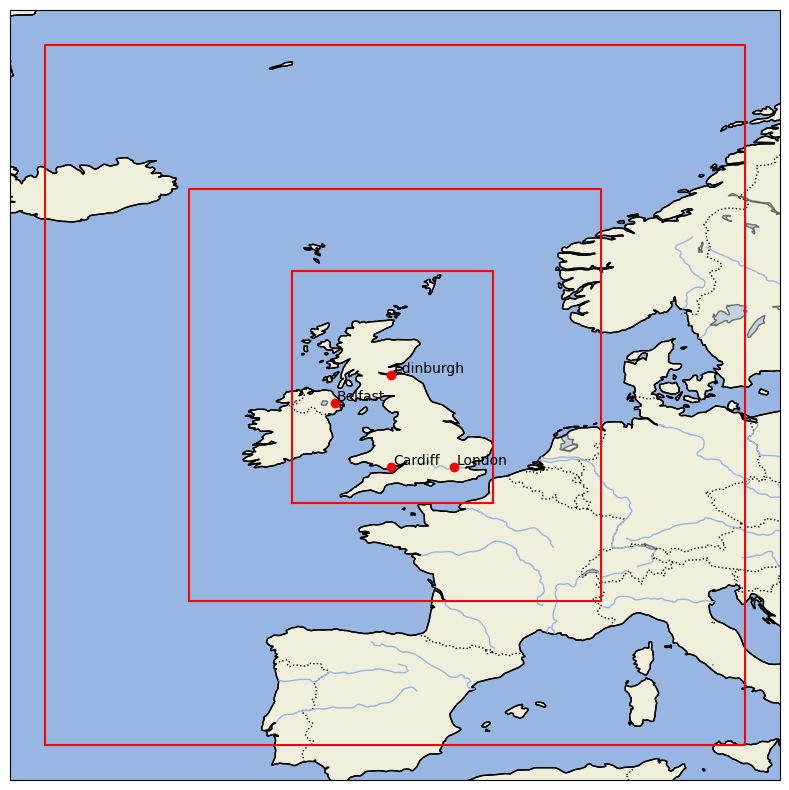

In [35]:
# Create a map with PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': proj})

# Add geographical features
add_geo_features(ax)

# Add cities
cities = {
    'London': (-0.1276, 51.5074),
    'Edinburgh': (-3.1883, 55.9533),
    'Cardiff': (-3.1791, 51.4816),
    'Belfast': (-5.9301, 54.5973)
}
add_cities(ax, cities)
# uk settlements
bounding_box(ax, uk_small)
# uk big
bounding_box(ax, uk_big)
# bounding_box(ax, larger_uk_small)
bounding_box(ax, larger_uk_big)

## Different coarse2fine edgeset